# **성능관리_종합실습**

## **(1) 환경준비**

### **1) 라이브러리 불러오기**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

### **2) 함수만들기**

In [44]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **3) 데이터 로딩**

In [45]:
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

rd.seed(20)
tr_id = rd.sample(range(60000), 4000)
va_id = rd.sample(range(10000), 1000)

x_train, y_train = x_train[tr_id], y_train[tr_id]
x_val, y_val = x_val[va_id], y_val[va_id]

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **4) 데이터 둘러보기**

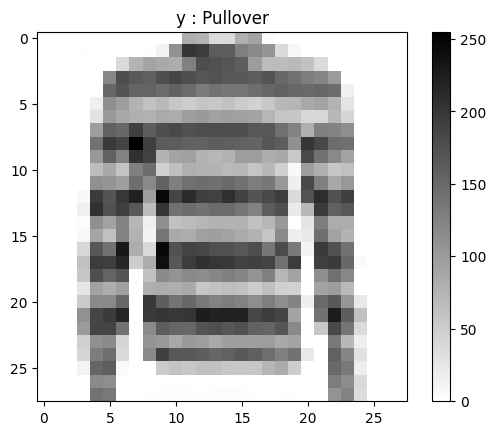

In [47]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 90
i = y_val[n]

plt.imshow(x_val[n], cmap=plt.cm.binary)
plt.title(f'y : {class_names[i]}')
plt.colorbar()
plt.show()

## **(2) 데이터준비**

### 1) 데이터 2차원으로 펼치기

In [48]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4000, 28, 28), (4000,), (1000, 28, 28), (1000,))

In [49]:
# 펼치기
x_train = x_train.reshape(4000, -1)
x_val = x_val.reshape(1000, -1)

In [50]:
x_train.shape, x_val.shape

((4000, 784), (1000, 784))

### 2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [51]:
x_train = x_train / 255.
x_val = x_val / 255.

## (3) 모델링

* 히든레이어의 노드를 다음과 같이 구성합니다.
    * 128, 64, 32, 16, 10
* epoch : 50 ~
* learning_rate : 0.01 ~ 0.0001


### 1) 모델1 : 과적합 모델
* 위에서 제시한 구조대로 모델을 설계하고 학습합니다.

#### ① 모델설계

In [76]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential( [Input(shape = (nfeatures,)),
                      Dense(128, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(10, activation= 'relu'),
                      Dense(10, activation= 'softmax')] )

# 컴파일
model.compile(optimizer= Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy')

#### ② 학습

In [77]:
result = model.fit(x_train, y_train, epochs= 50, validation_data= (x_val, y_val)).history

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.8769 - val_loss: 0.9281
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8257 - val_loss: 0.8208
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6287 - val_loss: 0.6154
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5201 - val_loss: 0.5863
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5218 - val_loss: 0.5757
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4495 - val_loss: 0.5675
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4057 - val_loss: 0.5688
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4295 - val_loss: 0.5405
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3969 - val_loss: 0.5171
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3534 - val_loss: 0.5320
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3325 - val_loss: 0.5376
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

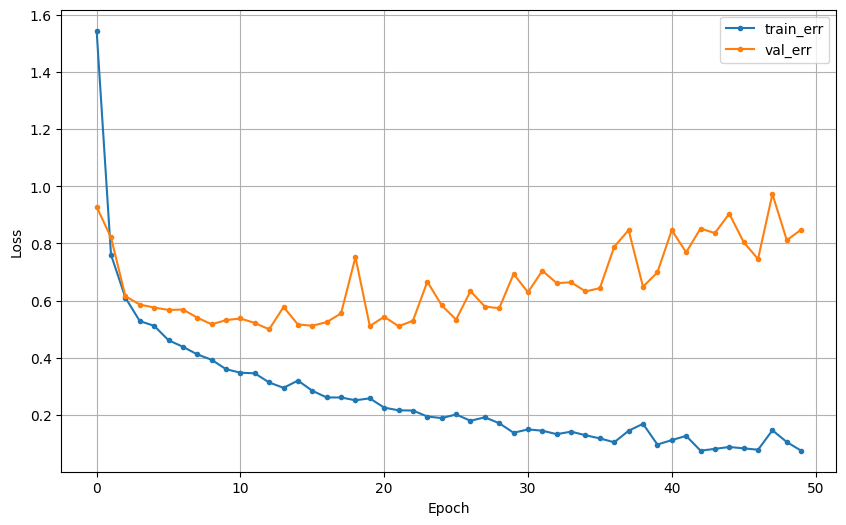

In [78]:
dl_history_plot(result)

#### ③ 예측 및 검증평가

In [79]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [80]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 69   0   3   7   0   0  19   0   1   0]
 [  1 101   0   3   0   0   1   0   0   0]
 [  1   0  68   1  11   0   6   0   0   0]
 [  1   2   2  82  14   0   3   0   0   0]
 [  0   0  10   6  74   1   7   0   1   0]
 [  0   0   0   0   0  88   0   2   0   2]
 [  9   0  10   6  12   0  55   0   1   0]
 [  0   0   0   0   0   2   0  77   0  14]
 [  2   0   1   1   3   0   0   0  91   0]
 [  0   0   0   0   0   2   0   5   0 122]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.98      0.95      0.97       106
           2       0.72      0.78      0.75        87
           3       0.77      0.79      0.78       104
           4       0.65      0.75      0.69        99
           5       0.95      0.96      0.95        92
           6       0.60      0.59      0.60        93
           7       0.92      0.83      0.87        93
           8       0.97      0.93      0.95        98
           9       0.88     

### 2) early stopping
* 모델1에 대해서, early stopping으로 과적합을 예방해 봅시다.

#### ① 모델설계

In [81]:
# 메모리 정리
clear_session()

# Sequential 타입
model2 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(128, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(10, activation= 'relu'),
                      Dense(10, activation= 'softmax')] )

# 컴파일
model2.compile(optimizer= Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy')

#### ② 학습

In [82]:
# EarlyStopping 설정 ------------------
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5)

In [83]:
hist2 = model2.fit(x_train, y_train, epochs = 100, validation_split=0.2,
                  callbacks = [es]).history

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.9810 - val_loss: 1.0169
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9137 - val_loss: 0.7835
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7193 - val_loss: 0.6352
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5760 - val_loss: 0.6005
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5199 - val_loss: 0.5809
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5463 - val_loss: 0.5642
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4518 - val_loss: 0.5746
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4546 - val_loss: 0.5674
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4038 - val_loss: 0.5570
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3600 - val_loss: 0.5780
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3443 - val_loss: 0.5725
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━

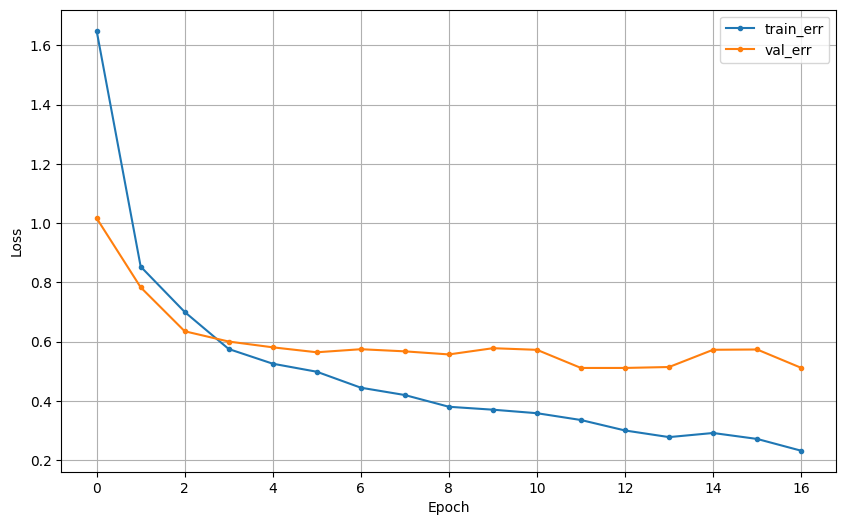

In [84]:
dl_history_plot(hist2)

#### ③ 예측 및 검증평가

In [61]:
pred2 = model2.predict(x_val)
pred2_1 = pred2.argmax(axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [62]:
print(confusion_matrix(y_val, pred2_1))
print(classification_report(y_val, pred2_1))

[[ 50   0   3   3   1   0  41   0   1   0]
 [  1  98   1   6   0   0   0   0   0   0]
 [  0   0  59   2   5   0  20   0   1   0]
 [  0   1   0  89   2   0  12   0   0   0]
 [  0   0  14   7  41   0  34   0   3   0]
 [  0   0   0   0   0  89   0   2   0   1]
 [  5   0   7   5   5   0  69   0   2   0]
 [  0   0   0   0   0   3   0  86   0   4]
 [  1   0   2   1   0   0   5   1  88   0]
 [  0   0   0   0   0   5   0  15   0 109]]
              precision    recall  f1-score   support

           0       0.88      0.51      0.64        99
           1       0.99      0.92      0.96       106
           2       0.69      0.68      0.68        87
           3       0.79      0.86      0.82       104
           4       0.76      0.41      0.54        99
           5       0.92      0.97      0.94        92
           6       0.38      0.74      0.50        93
           7       0.83      0.92      0.87        93
           8       0.93      0.90      0.91        98
           9       0.96     

### 3) Dropout
* 모델1에 대해서, Dropout으로 과적합을 방지해 봅시다.

#### ① 모델설계

In [101]:
# 메모리 정리
clear_session()

dropout_rate = 0.4
# Sequential 타입
model3 = Sequential( [Input(shape = (nfeatures,)),
                      Dropout(dropout_rate),
                      Dense(128, activation= 'relu'),
                      Dropout(dropout_rate),
                      Dense(64, activation= 'relu'),
                      Dropout(dropout_rate),
                      Dense(32, activation= 'relu'),
                      Dropout(dropout_rate),
                      Dense(16, activation= 'relu'),
                      Dropout(dropout_rate),
                      Dense(10, activation= 'relu'),
                      Dropout(dropout_rate),
                      Dense(10, activation= 'softmax')] )

# 컴파일
model3.compile(optimizer= Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy')

#### ② 학습

In [102]:
hist3 = model3.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

#### ③ 예측 및 검증평가

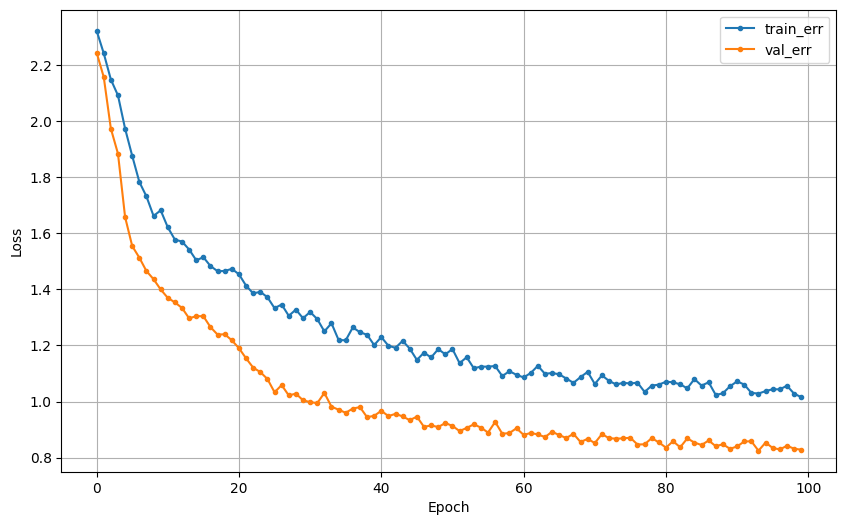

In [103]:
dl_history_plot(hist3)

In [104]:
pred3 = model3.predict(x_val)
pred3_1 = pred3.argmax(axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [93]:
print(confusion_matrix(y_val, pred3_1))
print(classification_report(y_val, pred3_1))

[[ 69   0   4   4   0   0  19   0   3   0]
 [  1 100   0   5   0   0   0   0   0   0]
 [  2   0  70   1   9   0   4   0   1   0]
 [  1   1   1  94   1   0   6   0   0   0]
 [  0   0  26  13  50   0   8   0   2   0]
 [  0   0   0   0   0  85   0   4   0   3]
 [  9   0  25   5   5   0  46   0   3   0]
 [  0   0   0   0   0   1   0  83   0   9]
 [  0   0   2   1   1   0   2   1  91   0]
 [  0   0   0   0   0   1   0  10   0 118]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.99      0.94      0.97       106
           2       0.55      0.80      0.65        87
           3       0.76      0.90      0.83       104
           4       0.76      0.51      0.61        99
           5       0.98      0.92      0.95        92
           6       0.54      0.49      0.52        93
           7       0.85      0.89      0.87        93
           8       0.91      0.93      0.92        98
           9       0.91     